# Outline 

Data that we must examine include:
  - Human Graded
  - GPT Graded (No Markscheme)
  - GPT Graded (Markscheme)
    
This notebook will explore this data through two seperate methods: 
1. Regression Plots
 - We have two options: Multiple 2D Plots, or a 3D Plot. 3D Plots are often hard to read and may not be able to provide much insight into the data we present. As such I will make regression plots for all permutations of our data, as well as calculating a $r^2$ and p-value for all plots. Conclusions will then be made depending on what is found. 
2. Clustering Plots
- Once again, like above we can implement both 2D and 3D Clustering plots. However, instead of making a 3D Plot, I will reduce dimensionality using PCA or t-SNE. I do not believe the reduced cluster should be the only one we examine, instead we should—just like with the regression—create a cluster with all permutations of data. This will allow us to catch clusters that may otherwise be "contaminated" by the addition of more data. Obviously all of these will produced with their own elbow plots. 

Thus, we have a total of: 

- Regression Plots: 3
    - GPT M vs GPT NM
    - GPT M vs HUMAN
    - GPT NM vs HUMAN

- Clustering Plots: 4
    - GPT M vs GPT NM
    - GPT M vs HUMAN
    - GPT NM vs HUMAN
    - GPT M vs GPT NM vs HUMAN (Reduced)
    
7 plots. 

In [1]:
#If you run this yourself, make sure all libraries are installed and the csv file is in the same folder as the notebook
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
mlp.rcParams['figure.dpi'] = 300
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
#import data as pandas df
EM = pd.read_csv("EM.csv") 
QM = pd.read_csv("QM.csv") 
CM = pd.read_csv("CM.csv") 

In [3]:
list(EM.columns) #checking header titles

['Question',
 'Total_Marks',
 'Human_Grade',
 'GPT_Grade_NM',
 'GPT_Grade_M',
 'Normal_HG',
 'Normal_GPT_NM',
 'Normal_GPT_M',
 'std_dev_HG',
 'std_dev_GPT_NM',
 'std_dev_GPT_M',
 'Norm_std_dev_HG',
 'Norm_std_dev_GPT_NM',
 'Norm_std_dev_GPT_M']

In [4]:
data = pd.concat([EM, QM, CM]) #combining all data

## Regression GPT Markscheme vs GPT No Markscheme

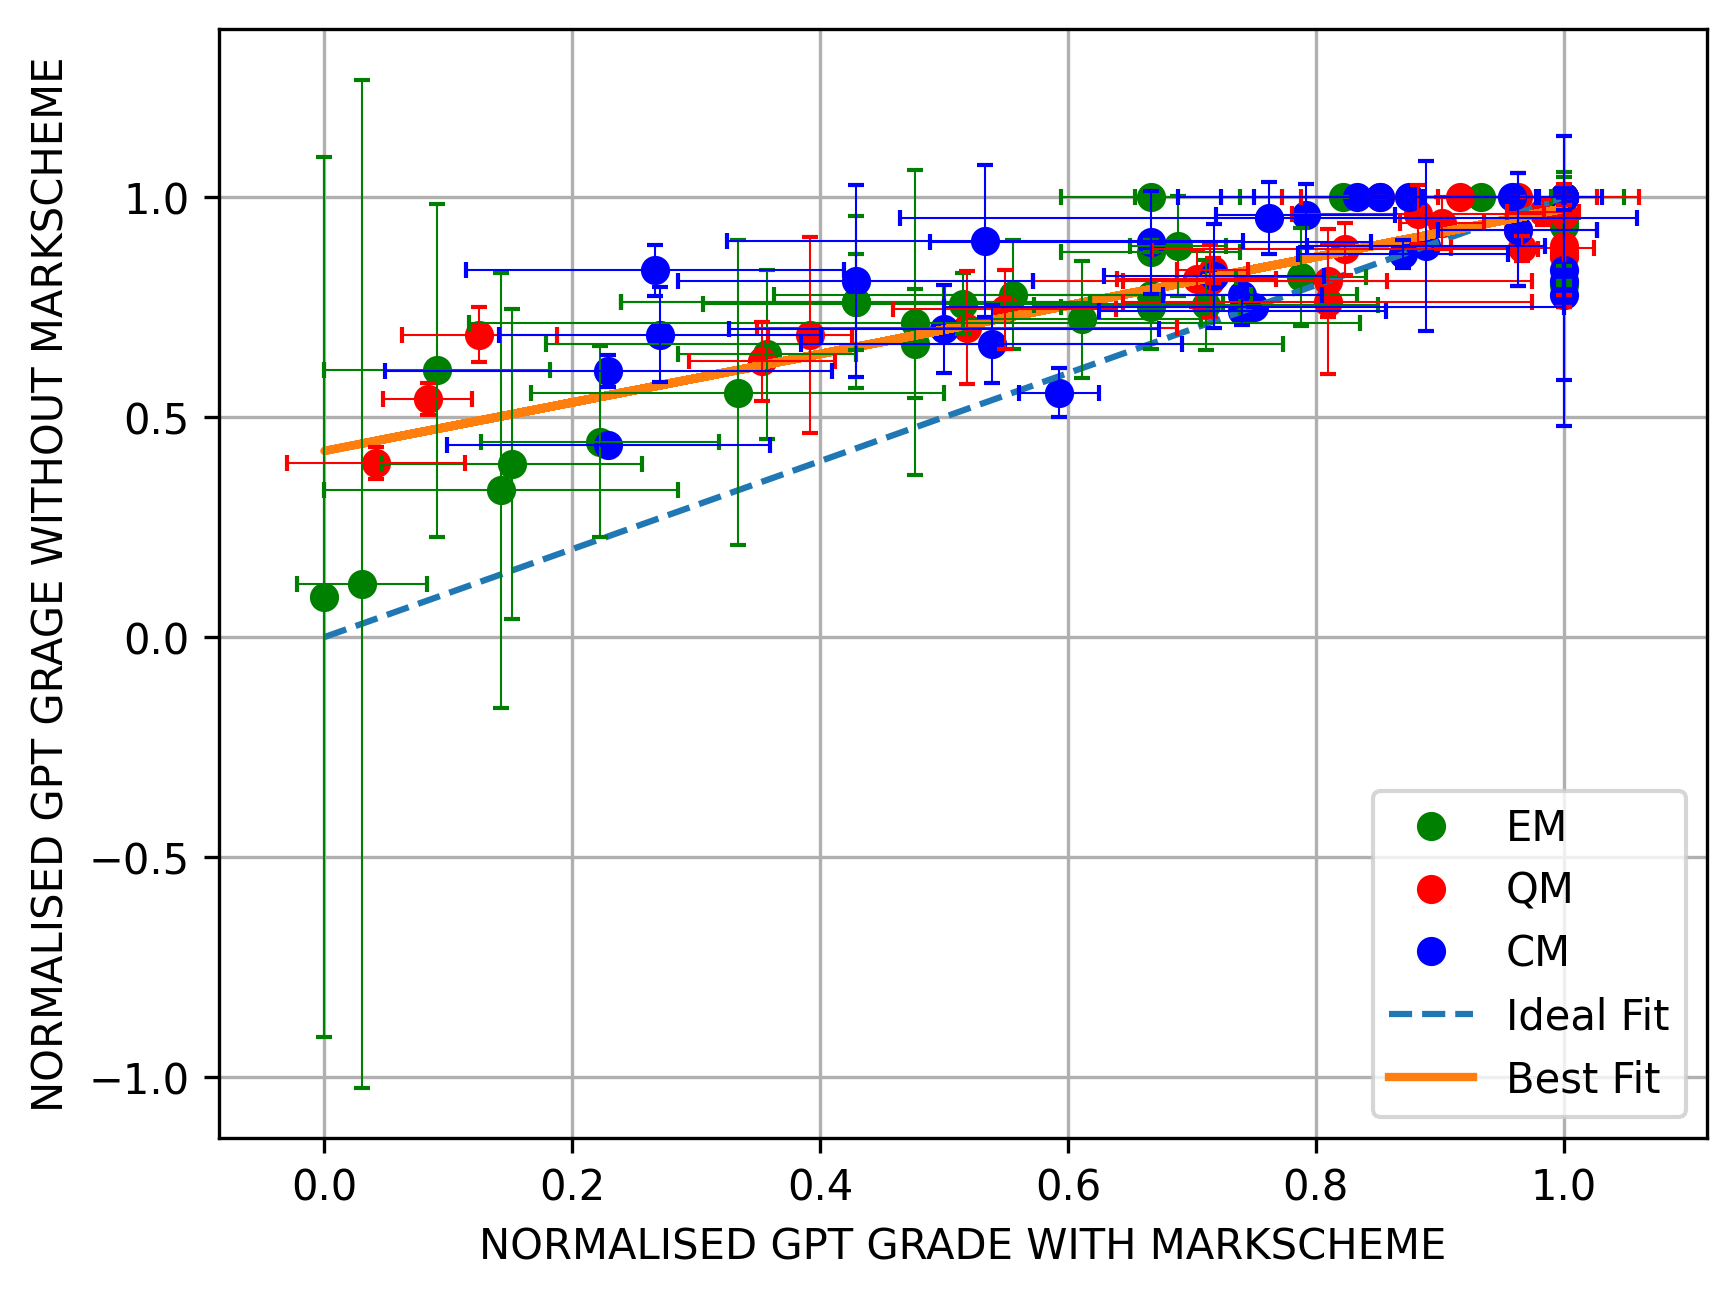

<Figure size 1920x1440 with 0 Axes>

In [5]:
# Plot data and set labels
plt.plot(data['Normal_GPT_M'][0:30], data['Normal_GPT_NM'][0:30], 'o', color = 'green', label = "EM")
plt.plot(data['Normal_GPT_M'][30:60], data['Normal_GPT_NM'][30:60], 'o', color = 'red', label = "QM")
plt.plot(data['Normal_GPT_M'][60:90], data['Normal_GPT_NM'][60:90], 'o', color = 'blue', label = "CM")
plt.xlabel('NORMALISED GPT GRADE WITH MARKSCHEME')
plt.ylabel('NORMALISED GPT GRAGE WITHOUT MARKSCHEME')
plt.plot(np.linspace(0,1,2),np.linspace(0,1,2), '--', label = "Ideal Fit")
# Fit the trend line
z = np.polyfit(data['Normal_GPT_M'], data['Normal_GPT_NM'], 1)
p = np.poly1d(z)
plt.plot(data['Normal_GPT_M'],p(data['Normal_GPT_M']),"-", linewidth=2, label = "Best Fit")
plt.errorbar(data['Normal_GPT_M'][0:30],data['Normal_GPT_NM'][0:30], xerr = data['Norm_std_dev_GPT_M'][0:30],yerr=data['Norm_std_dev_GPT_NM'][0:30], ls='none', elinewidth=0.5, capsize=2, color = "green")
plt.errorbar(data['Normal_GPT_M'][30:60],data['Normal_GPT_NM'][30:60],xerr=data['Norm_std_dev_GPT_M'][30:60], yerr=data['Norm_std_dev_GPT_NM'][30:60], ls='none', elinewidth=0.5, capsize=2, color = "red")
plt.errorbar(data['Normal_GPT_M'][60:90],data['Normal_GPT_NM'][60:90],xerr=data['Norm_std_dev_GPT_M'][60:90], yerr=data['Norm_std_dev_GPT_NM'][60:90], ls='none', elinewidth=0.5, capsize=2, color = "blue")
# Show the plot
plt.legend()
plt.grid()
plt.show()
plt.savefig("MvNM.png")

In [6]:
scipy.stats.pearsonr(data['Normal_GPT_M'], data['Normal_GPT_NM']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.84815745899633, pvalue=5.199391569844949e-26)

## Regression GPT Markscheme vs Human Graded

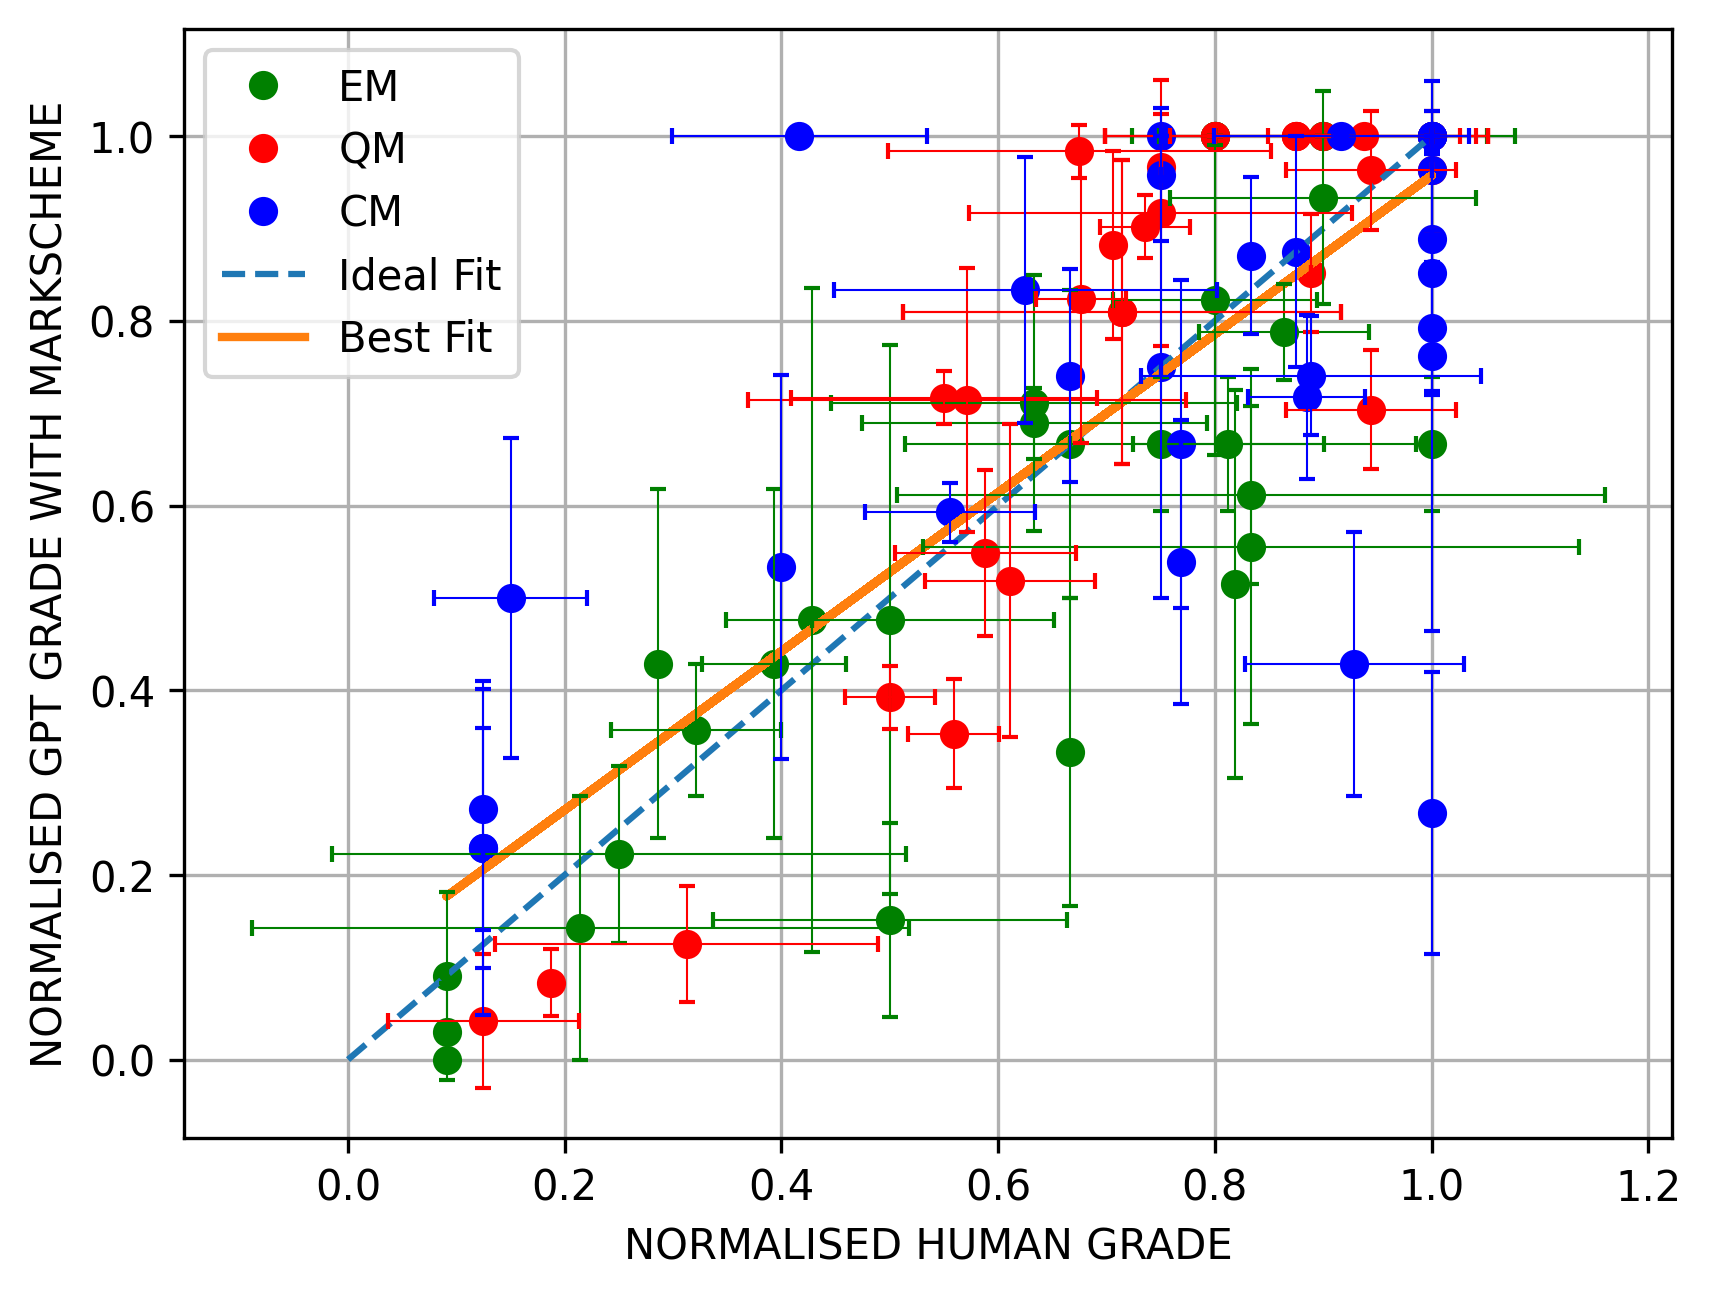

<Figure size 1920x1440 with 0 Axes>

In [7]:
# Plot data and set labels
plt.plot(data['Normal_HG'][0:30], data['Normal_GPT_M'][0:30] ,'o', color = 'green', label = "EM")
plt.plot(data['Normal_HG'][30:60], data['Normal_GPT_M'][30:60], 'o', color = 'red', label = "QM")
plt.plot(data['Normal_HG'][60:90], data['Normal_GPT_M'][60:90], 'o', color = 'blue', label = "CM")
plt.ylabel('NORMALISED GPT GRADE WITH MARKSCHEME')
plt.xlabel('NORMALISED HUMAN GRADE')
plt.plot(np.linspace(0,1,2),np.linspace(0,1,2), '--', label = "Ideal Fit")
# Fit the trend line
z = np.polyfit(data['Normal_HG'], data['Normal_GPT_M'], 1)
p = np.poly1d(z)
plt.plot(data['Normal_HG'],p(data['Normal_HG']), linewidth=2, label = "Best Fit")
plt.errorbar(data['Normal_HG'][0:30], data['Normal_GPT_M'][0:30] , yerr=data['Norm_std_dev_GPT_M'][0:30],xerr=data['Norm_std_dev_HG'][0:30], ls='none', elinewidth=0.5, capsize=2, color = "green")
plt.errorbar(data['Normal_HG'][30:60], data['Normal_GPT_M'][30:60],yerr=data['Norm_std_dev_GPT_M'][30:60], xerr=data['Norm_std_dev_HG'][30:60], ls='none', elinewidth=0.5, capsize=2, color = "red")
plt.errorbar(data['Normal_HG'][60:90], data['Normal_GPT_M'][60:90], yerr=data['Norm_std_dev_GPT_M'][60:90], xerr=data['Norm_std_dev_HG'][60:90], ls='none', elinewidth=0.5, capsize=2, color = "blue")
# Show the plot
plt.legend()
plt.grid()
plt.show()
plt.savefig("MvHG.png")

In [8]:
scipy.stats.pearsonr(data['Normal_GPT_M'], data['Normal_HG']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.7875491758678023, pvalue=3.372892504233281e-20)

## Regression GPT  No Markscheme vs Human Graded

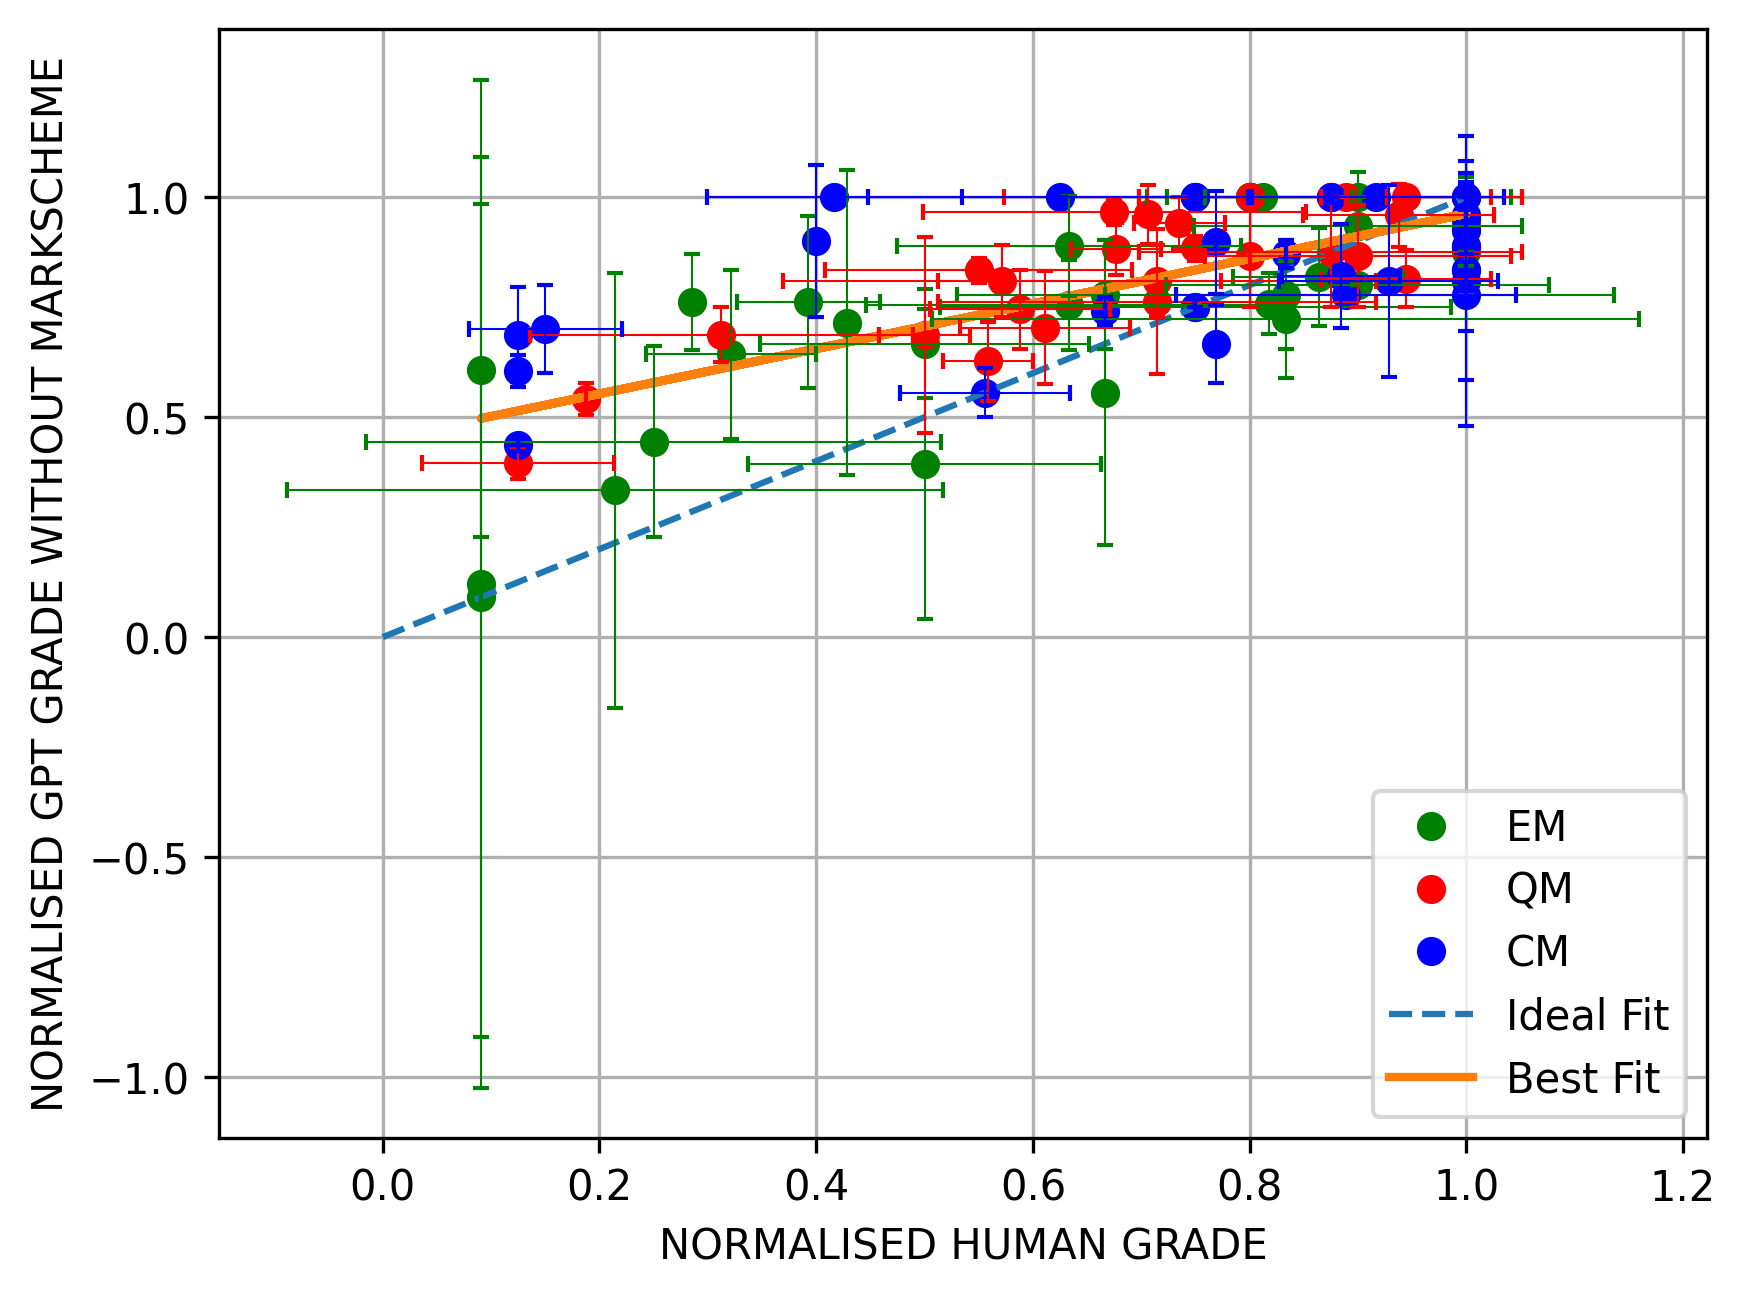

<Figure size 1920x1440 with 0 Axes>

In [9]:
# Plot data and set labels
plt.plot(data['Normal_HG'][0:30], data['Normal_GPT_NM'][0:30] ,'o', color = 'green', label = "EM")
plt.plot(data['Normal_HG'][30:60], data['Normal_GPT_NM'][30:60], 'o', color = 'red', label = "QM")
plt.plot(data['Normal_HG'][60:90], data['Normal_GPT_NM'][60:90], 'o', color = 'blue', label = "CM")
plt.ylabel('NORMALISED GPT GRADE WITHOUT MARKSCHEME')
plt.xlabel('NORMALISED HUMAN GRADE')
plt.plot(np.linspace(0,1,2),np.linspace(0,1,2), '--', label = "Ideal Fit")
# Fit the trend line
z = np.polyfit(data['Normal_HG'], data['Normal_GPT_NM'], 1)
p = np.poly1d(z)
plt.plot(data['Normal_HG'],p(data['Normal_HG']), linewidth=2, label = "Best Fit")
plt.errorbar(data['Normal_HG'][0:30], data['Normal_GPT_NM'][0:30] , yerr=data['Norm_std_dev_GPT_NM'][0:30],xerr=data['Norm_std_dev_HG'][0:30], ls='none', elinewidth=0.5, capsize=2, color = "green")
plt.errorbar(data['Normal_HG'][30:60], data['Normal_GPT_NM'][30:60],yerr=data['Norm_std_dev_GPT_NM'][30:60], xerr=data['Norm_std_dev_HG'][30:60], ls='none', elinewidth=0.5, capsize=2, color = "red")
plt.errorbar(data['Normal_HG'][60:90], data['Normal_GPT_NM'][60:90], yerr=data['Norm_std_dev_GPT_NM'][60:90], xerr=data['Norm_std_dev_HG'][60:90], ls='none', elinewidth=0.5, capsize=2, color = "blue")
# Show the plot
plt.legend()
plt.grid()
plt.show()
plt.savefig("NMvHG.png")

In [10]:
scipy.stats.pearsonr(data['Normal_GPT_NM'], data['Normal_HG']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.722863983059397, pvalue=8.682354923167096e-16)

The order of correlation was [NM vs HG] < [M vs HG] < [NM vs M]

## Clustering GPT Markscheme vs GPT No Markscheme

In [11]:
#create data structure to cluster
clust_data_1 = list(zip(data['Normal_GPT_M'], data['Normal_GPT_NM']))

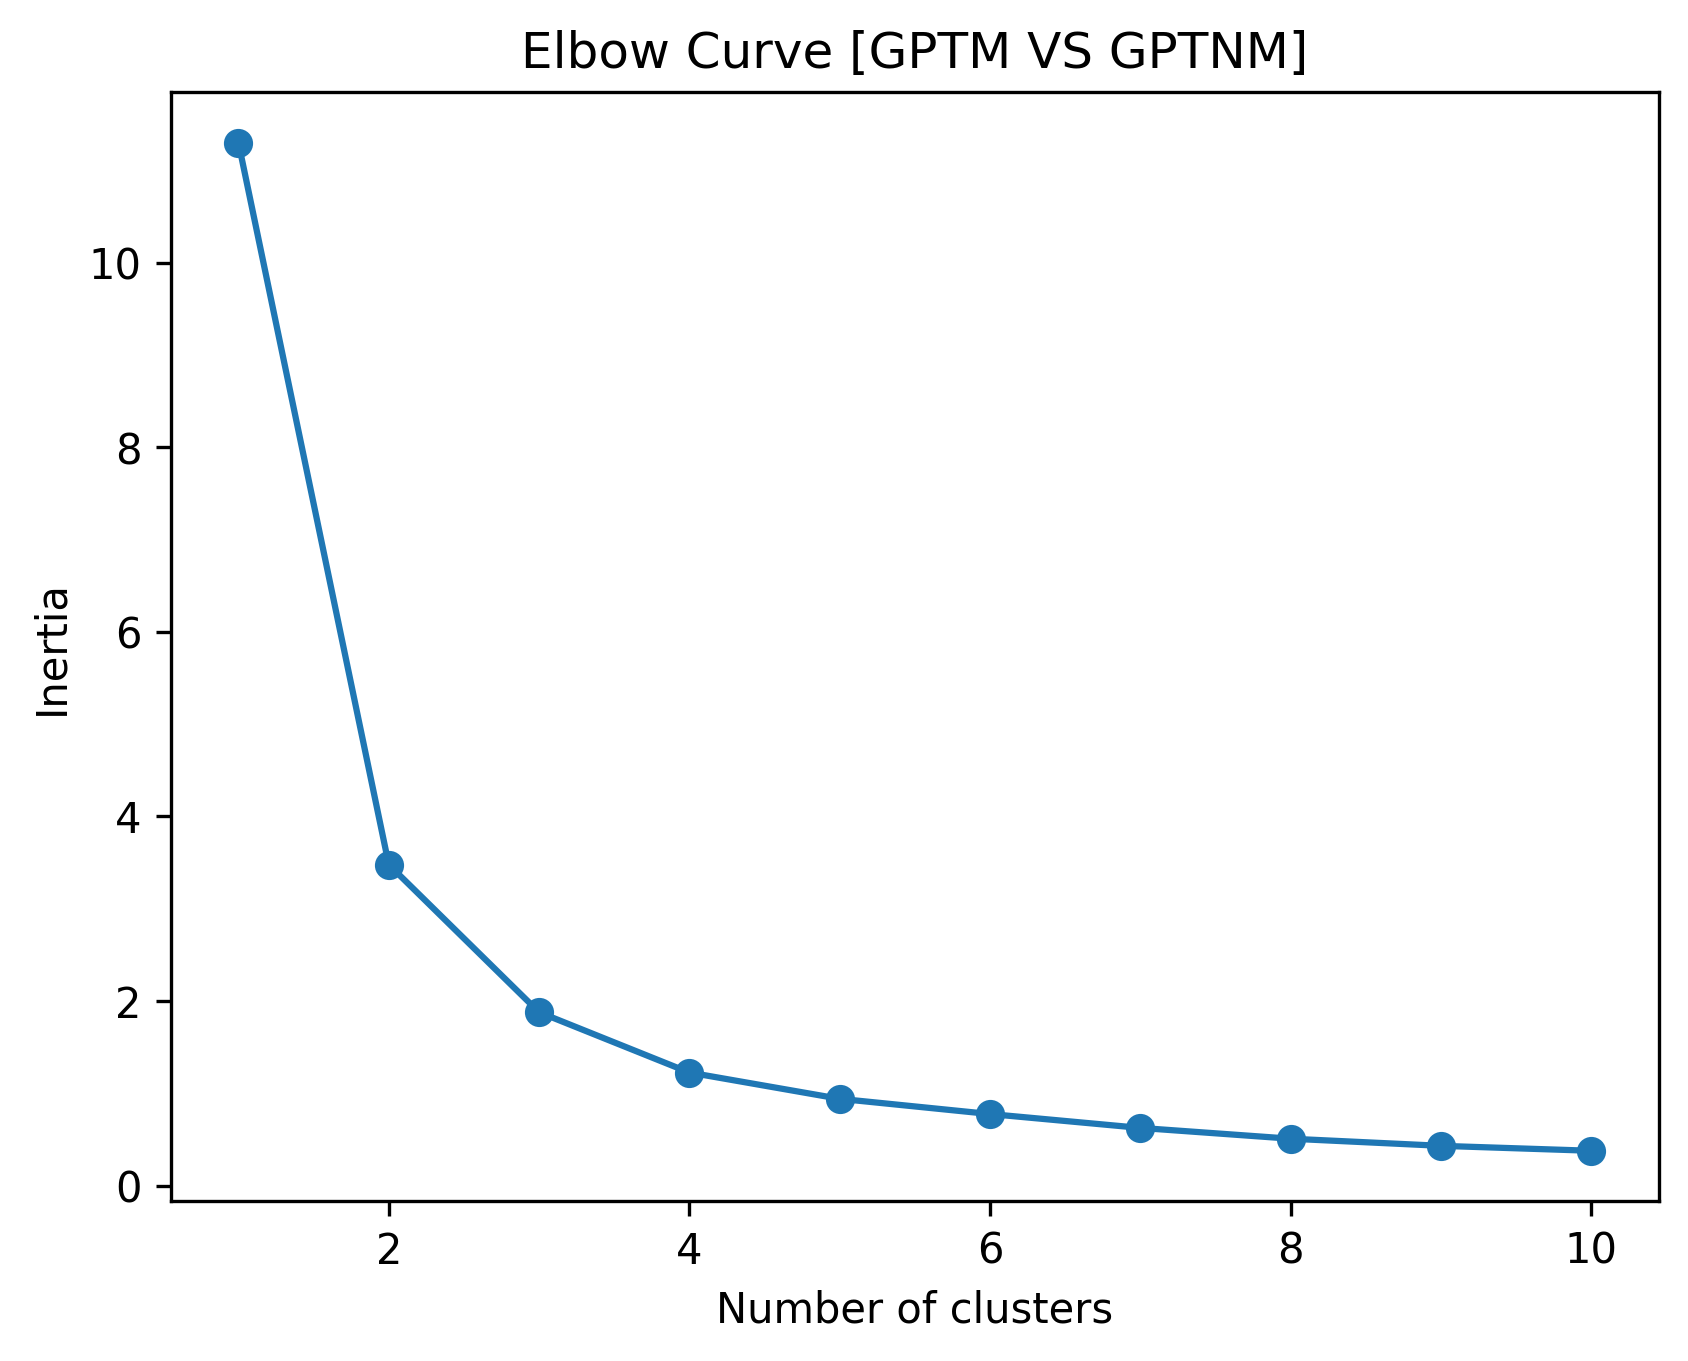

In [12]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_1)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [GPTM VS GPTNM]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

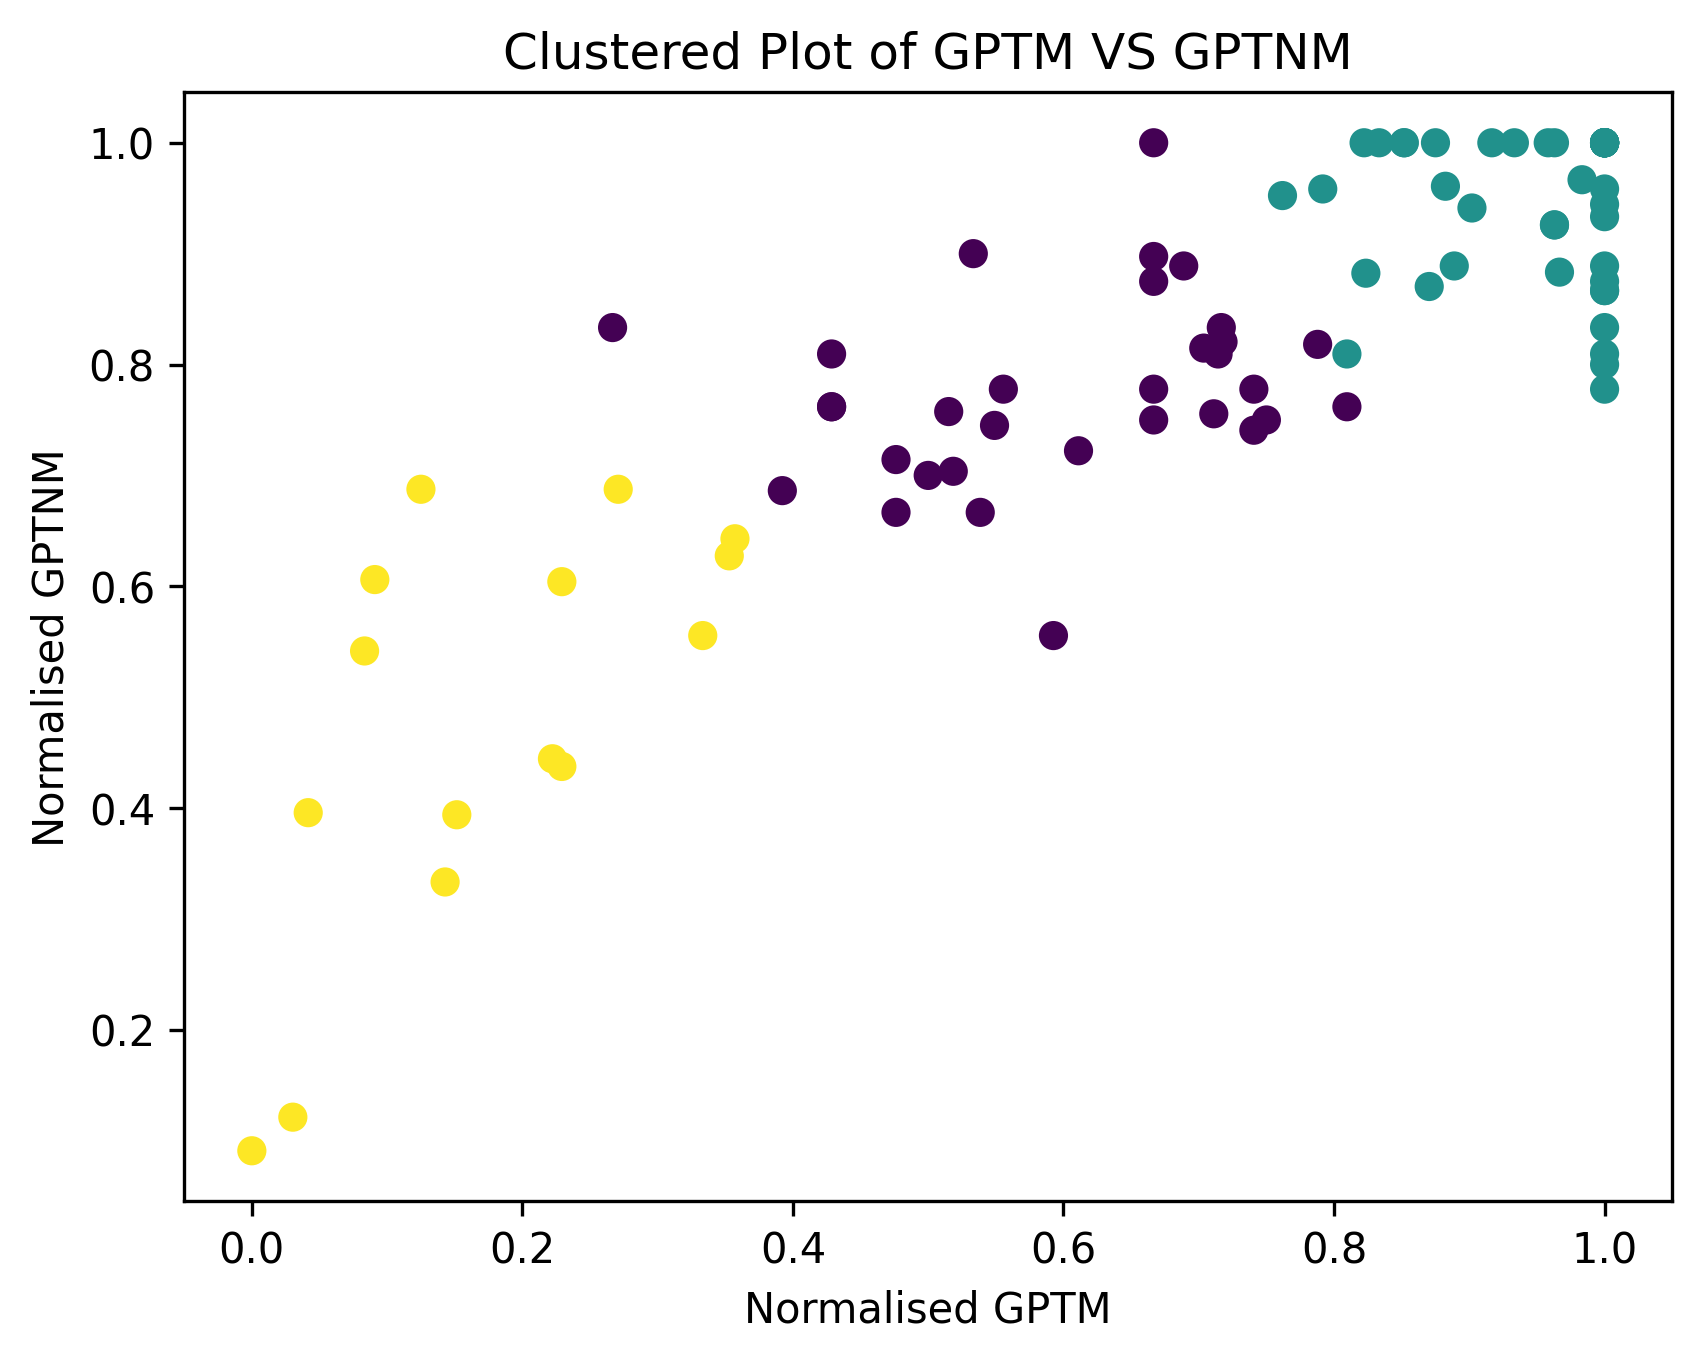

1 = green, 2 = yellow, 0 = purple


In [13]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_1)

#Plotting classified data
plt.scatter(data['Normal_GPT_M'], data['Normal_GPT_NM'], c=kmeans.labels_)
plt.xlabel("Normalised GPTM")
plt.ylabel("Normalised GPTNM")
plt.title("Clustered Plot of GPTM VS GPTNM")
plt.show()
ques = np.arange(1,91,1)
print("1 = green, 2 = yellow, 0 = purple")
sort_1 = np.column_stack((kmeans.labels_,ques))
sort_1 = sort_1[sort_1[:,0].argsort()]

## Clustering GPT Markscheme vs Human Graded

In [14]:
#create data structure to cluster
clust_data_2 = list(zip(data['Normal_GPT_M'], data['Normal_HG']))

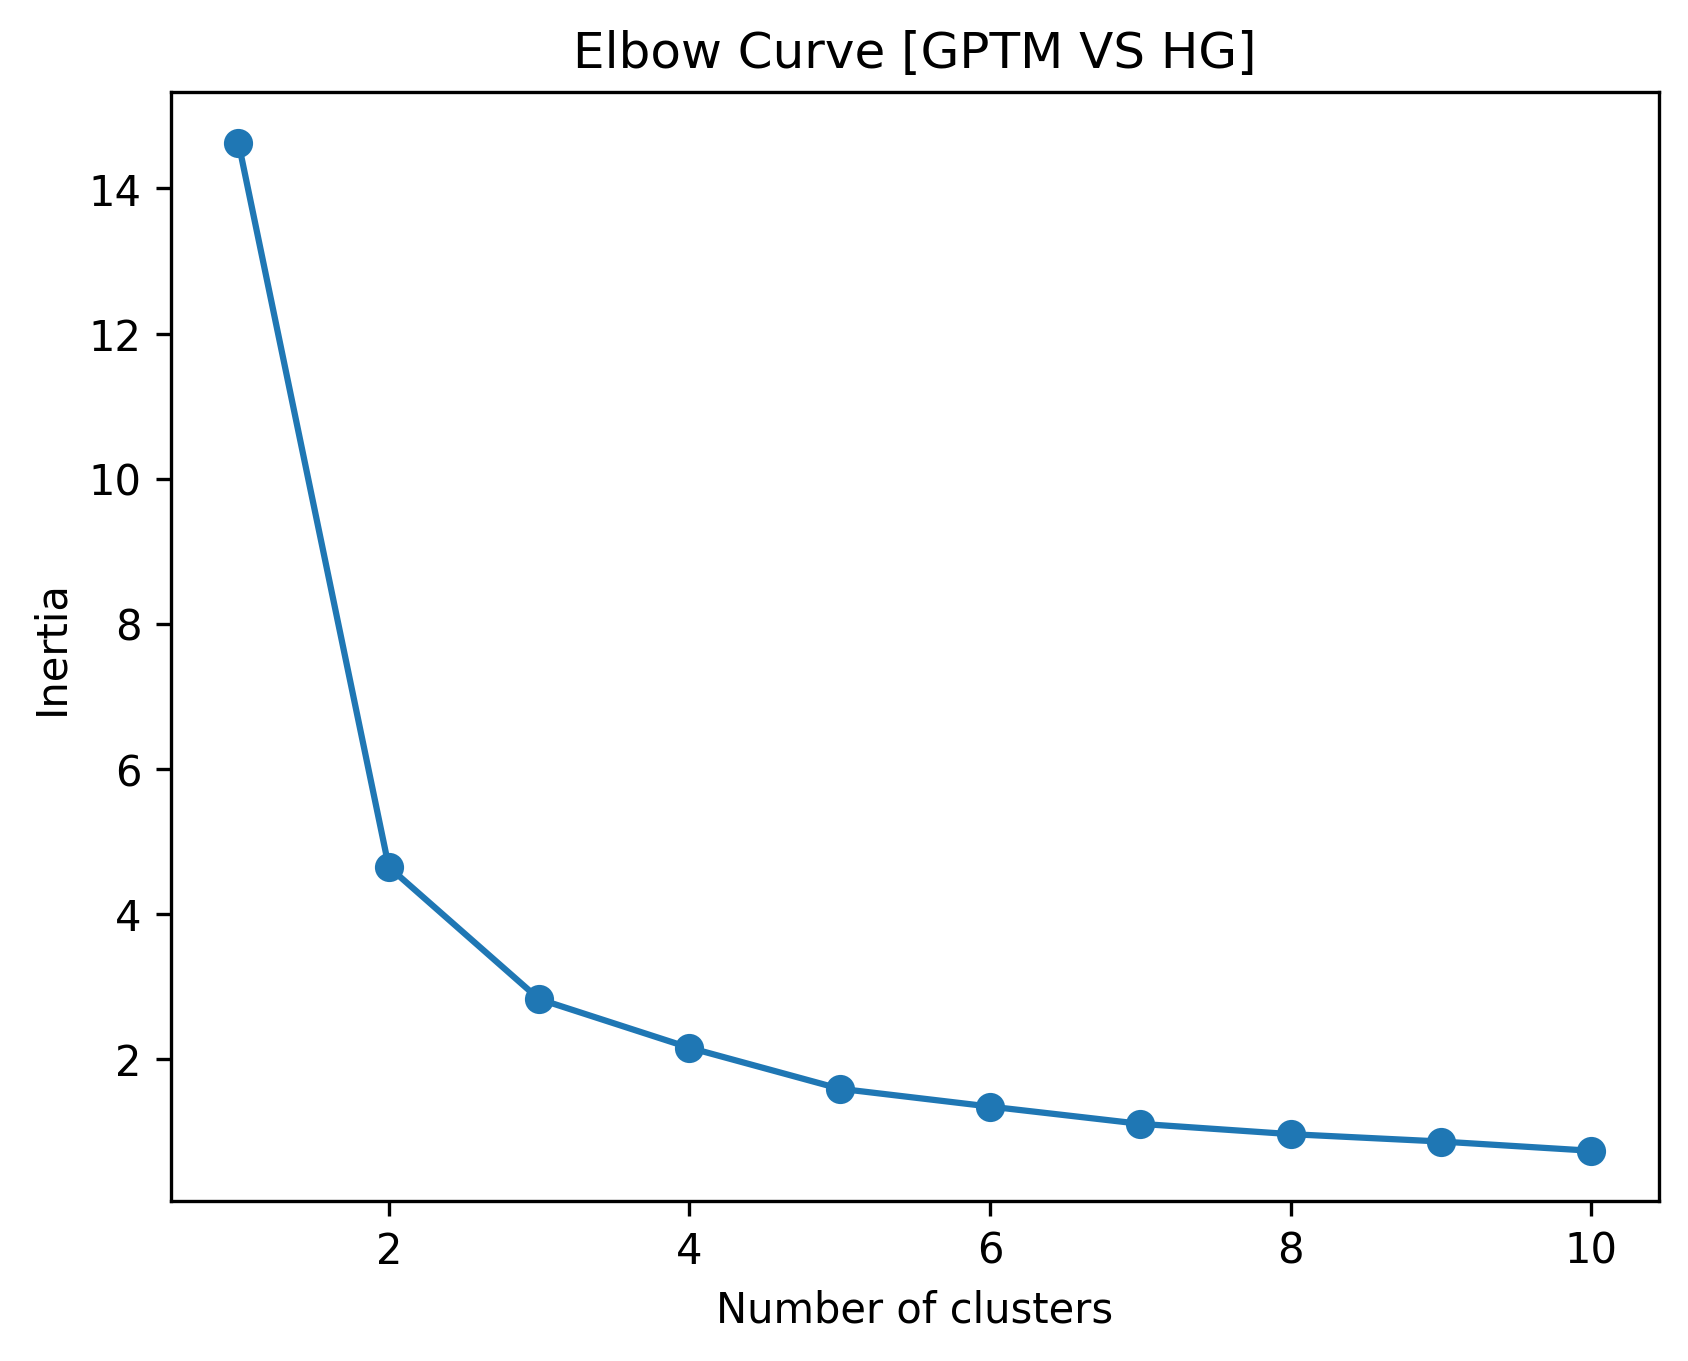

In [15]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_2)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [GPTM VS HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

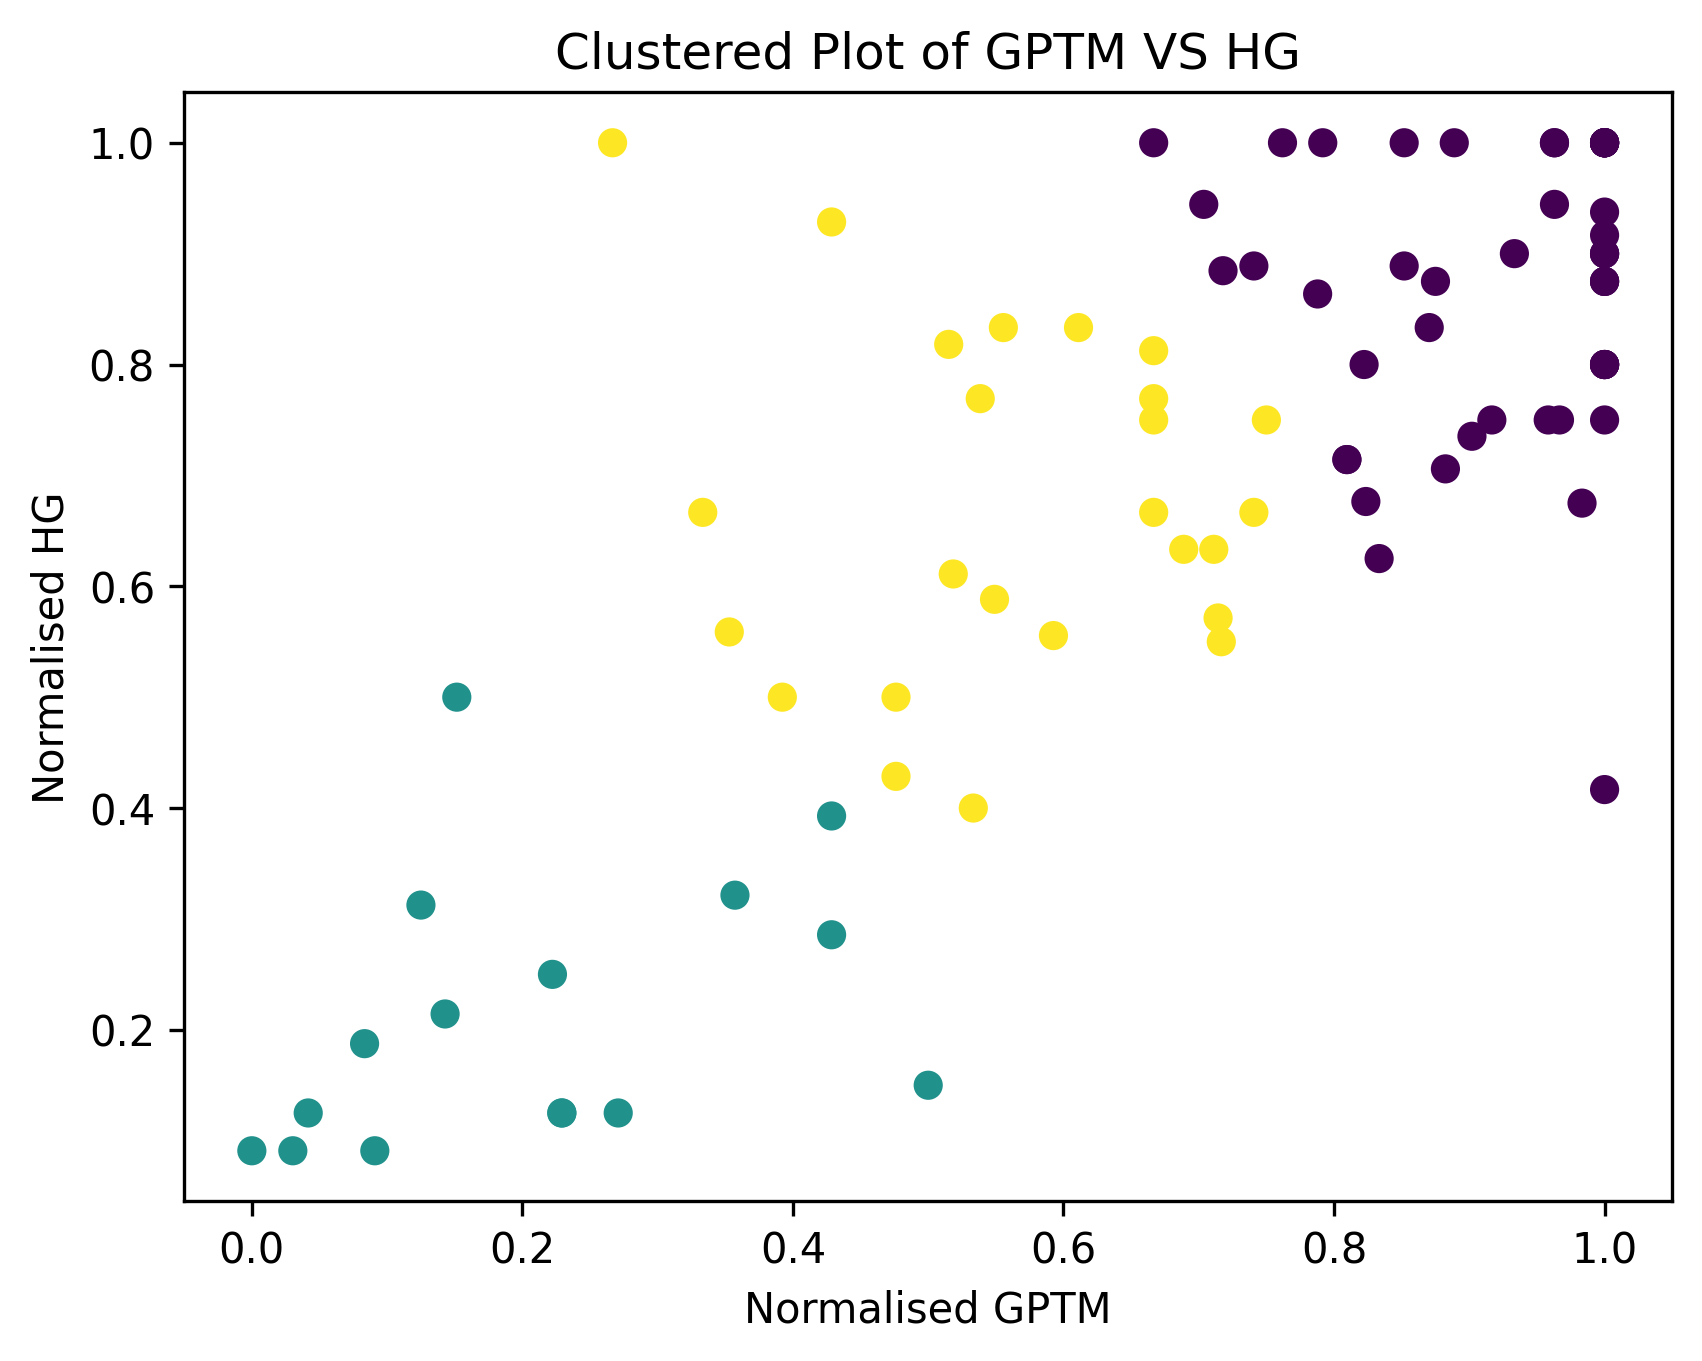

1 = green, 2 = yellow, 0 = purple


In [16]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_2)

#Plotting classified data
plt.scatter(data['Normal_GPT_M'], data['Normal_HG'], c=kmeans.labels_)
plt.xlabel("Normalised GPTM")
plt.ylabel("Normalised HG")
plt.title("Clustered Plot of GPTM VS HG")
plt.show()
print("1 = green, 2 = yellow, 0 = purple")
sort_2 = np.column_stack((kmeans.labels_,ques))
sort_2 = sort_2[sort_2[:,0].argsort()] 

## Clustering GPT  No Markscheme vs Human Graded

In [17]:
#create data structure to cluster
clust_data_3 = list(zip(data['Normal_GPT_NM'], data['Normal_HG']))

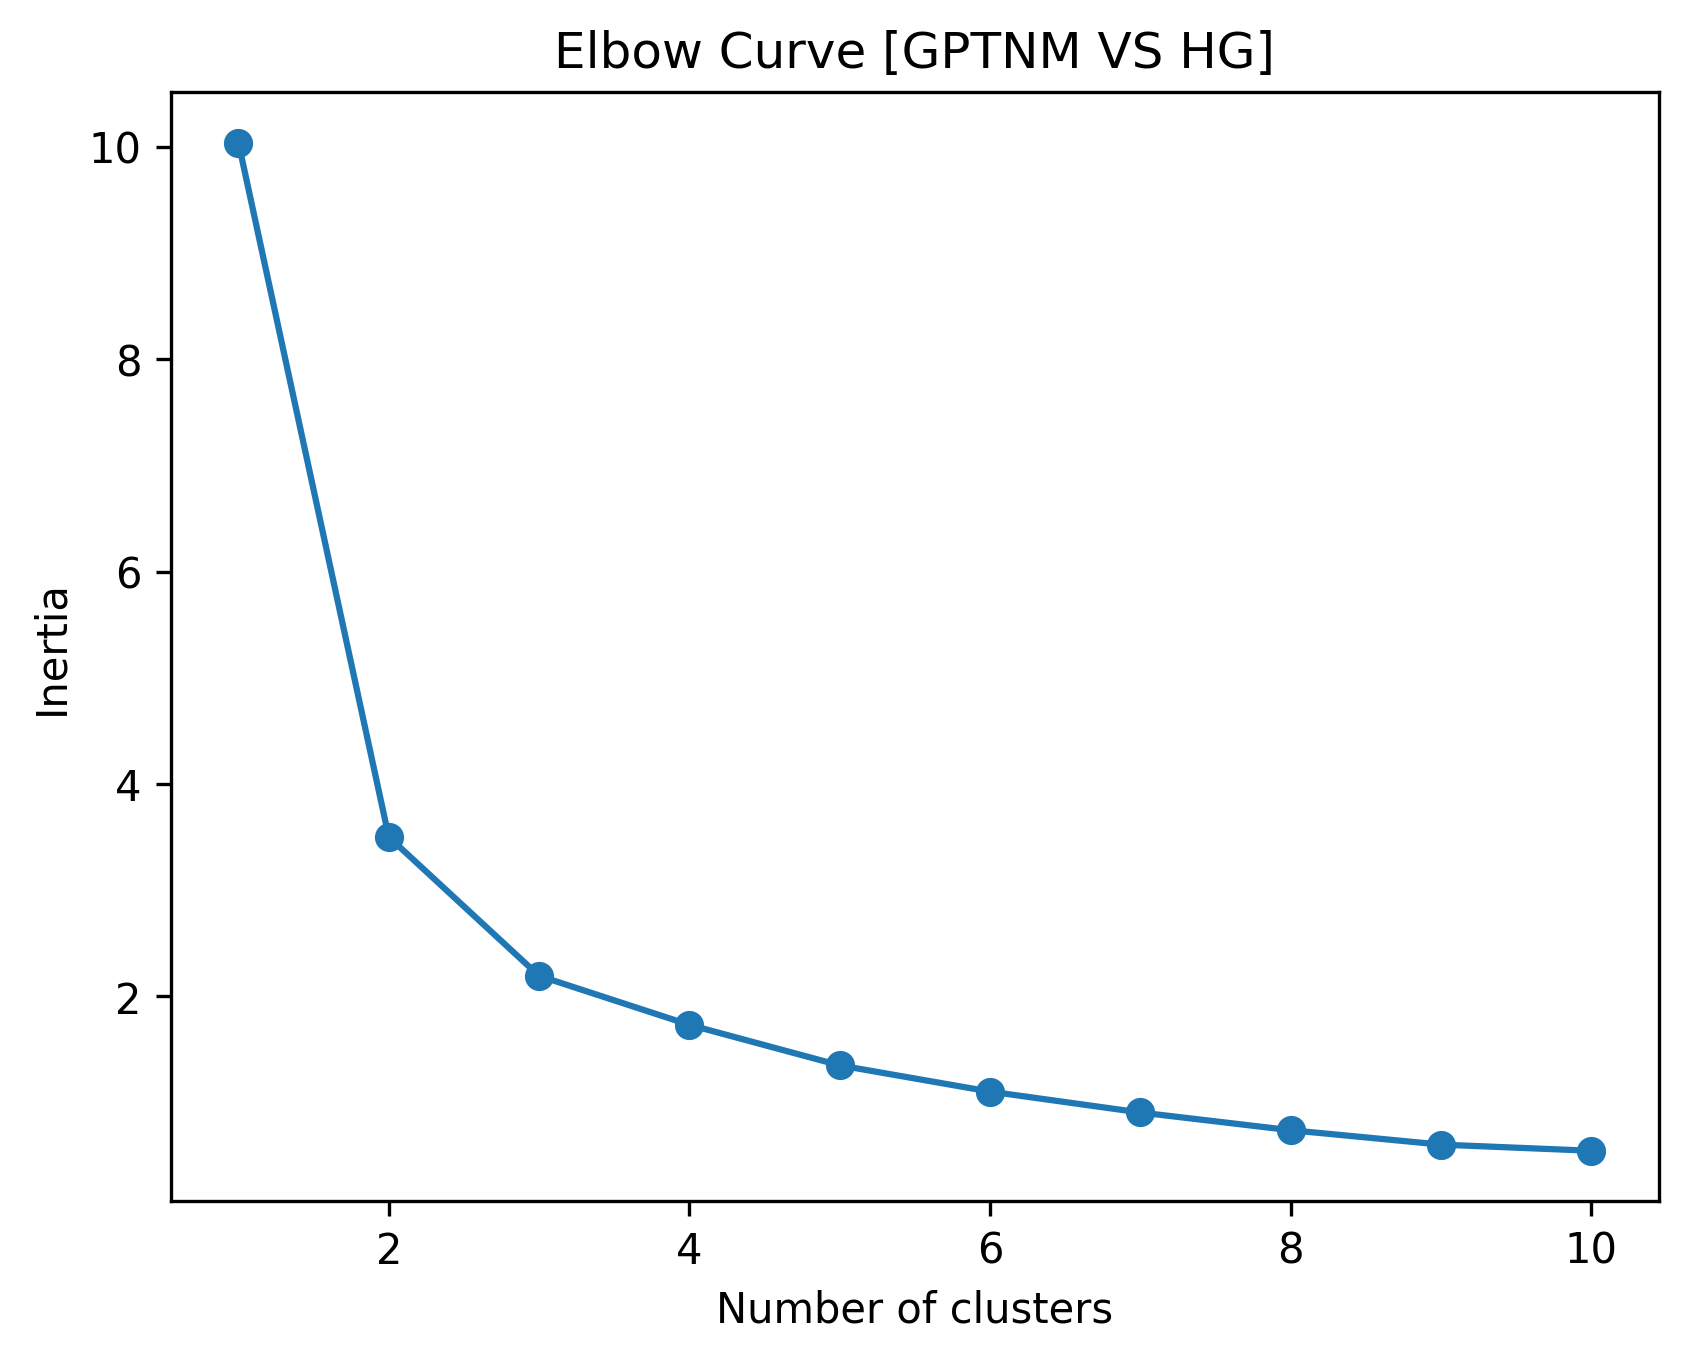

In [18]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_3)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [GPTNM VS HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

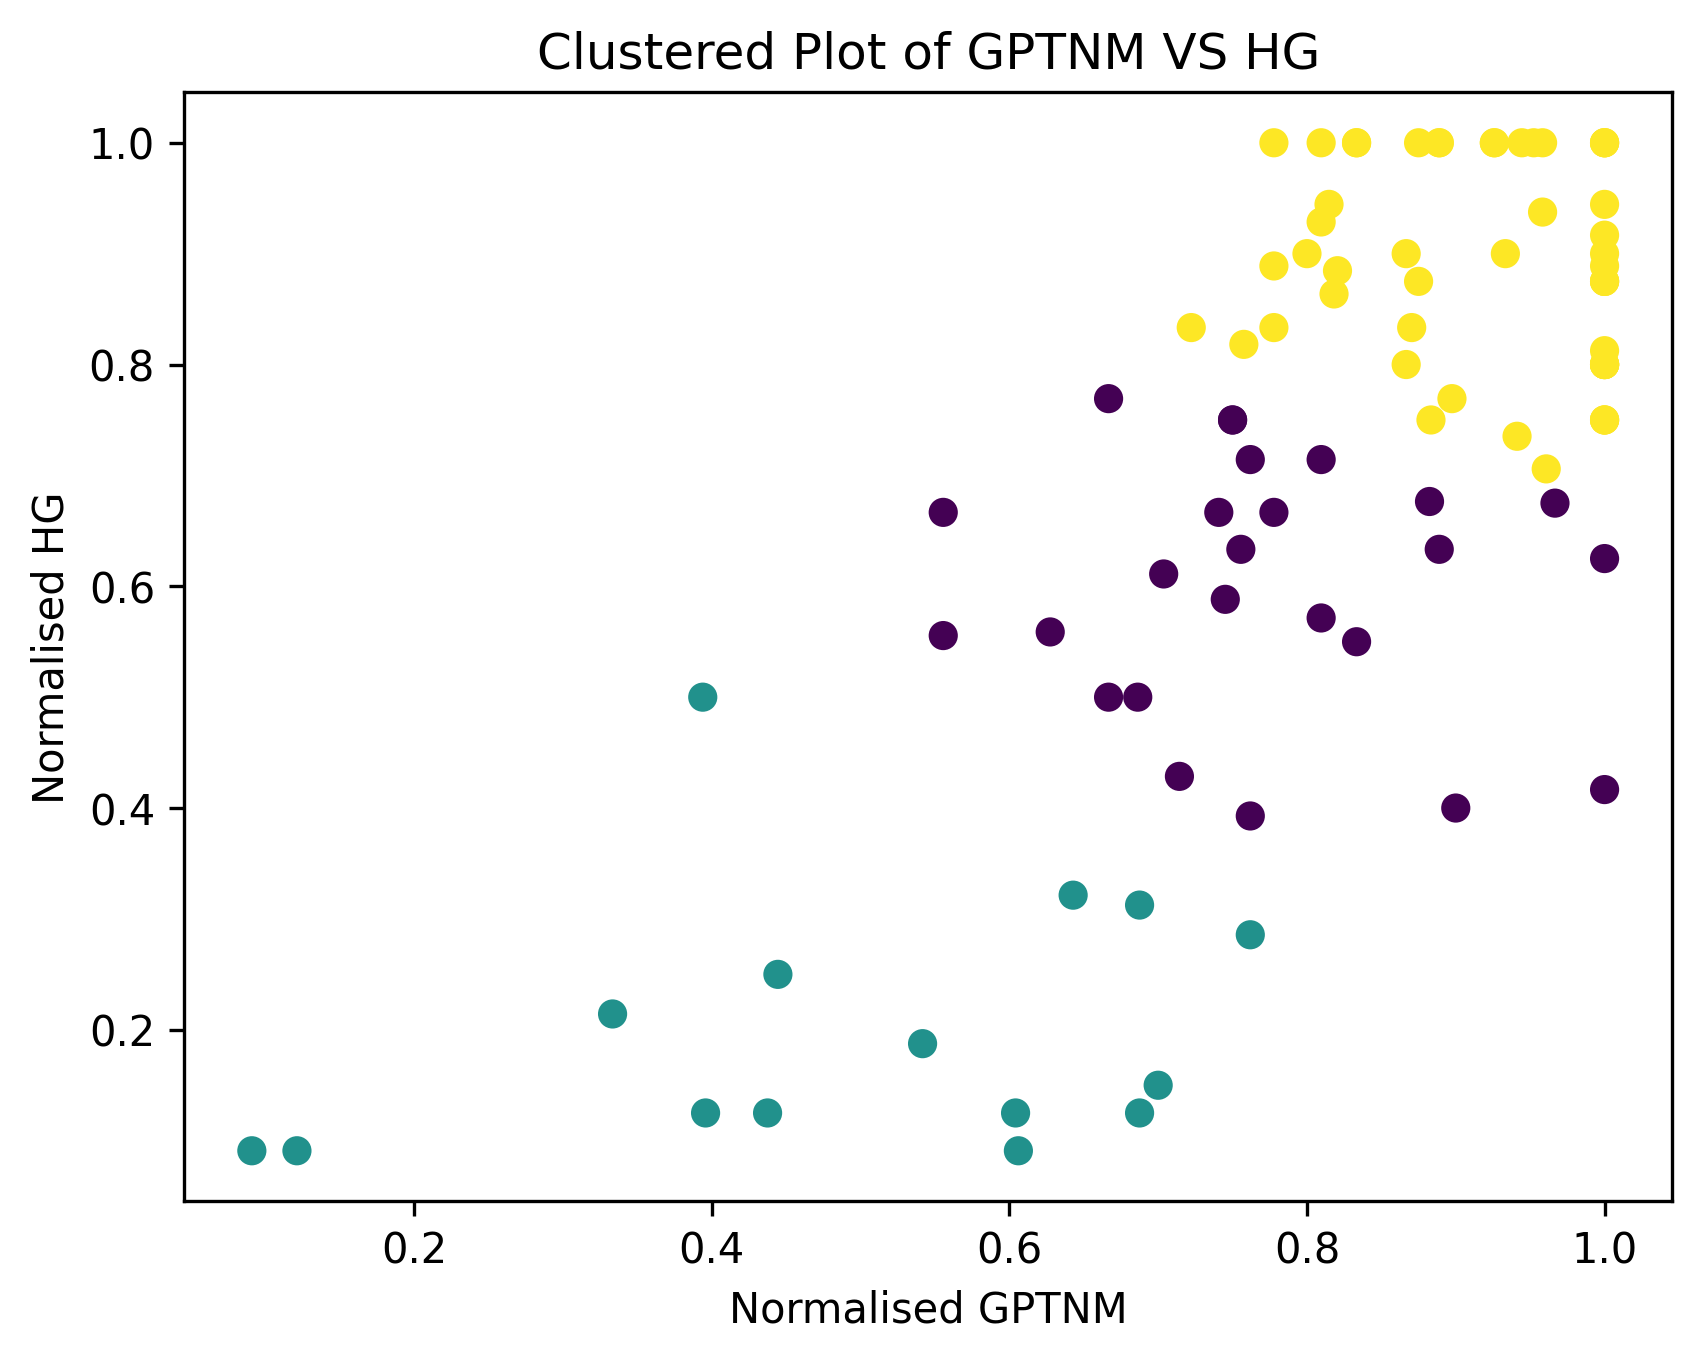

1 = green, 2 = yellow, 0 = purple


In [19]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_3)

#Plotting classified data
plt.scatter(data['Normal_GPT_NM'], data['Normal_HG'], c=kmeans.labels_)
plt.xlabel("Normalised GPTNM")
plt.ylabel("Normalised HG")
plt.title("Clustered Plot of GPTNM VS HG")
plt.show()
print("1 = green, 2 = yellow, 0 = purple")
sort_3 = np.column_stack((kmeans.labels_,ques))
sort_3 = sort_3[sort_3[:,0].argsort()] 

## Implementing t-SNE

In [20]:
red_data = data[["Normal_GPT_NM", "Normal_GPT_M", "Normal_HG"]] #creating data with only normalised grades

In [21]:
#running t-SNE
tsne = TSNE(learning_rate = 500, n_components = 2)
x_tsne = tsne.fit_transform(red_data)
y = np.concatenate(np.stack((np.repeat(1,30), np.repeat(2,30), np.repeat(3,30)), axis = 0)) #creating a subject marker
pd.DataFrame(x_tsne)

,0,1
0,7.336886,-81.407669
1,146.095932,73.788910
2,-182.719269,-66.345970
3,35.052395,-14.296751
4,-293.113831,10.148754
...,...,...
85,-250.226654,-94.322876
86,-92.474510,-65.320023
87,-155.477402,-88.207253
88,88.283379,-51.022343


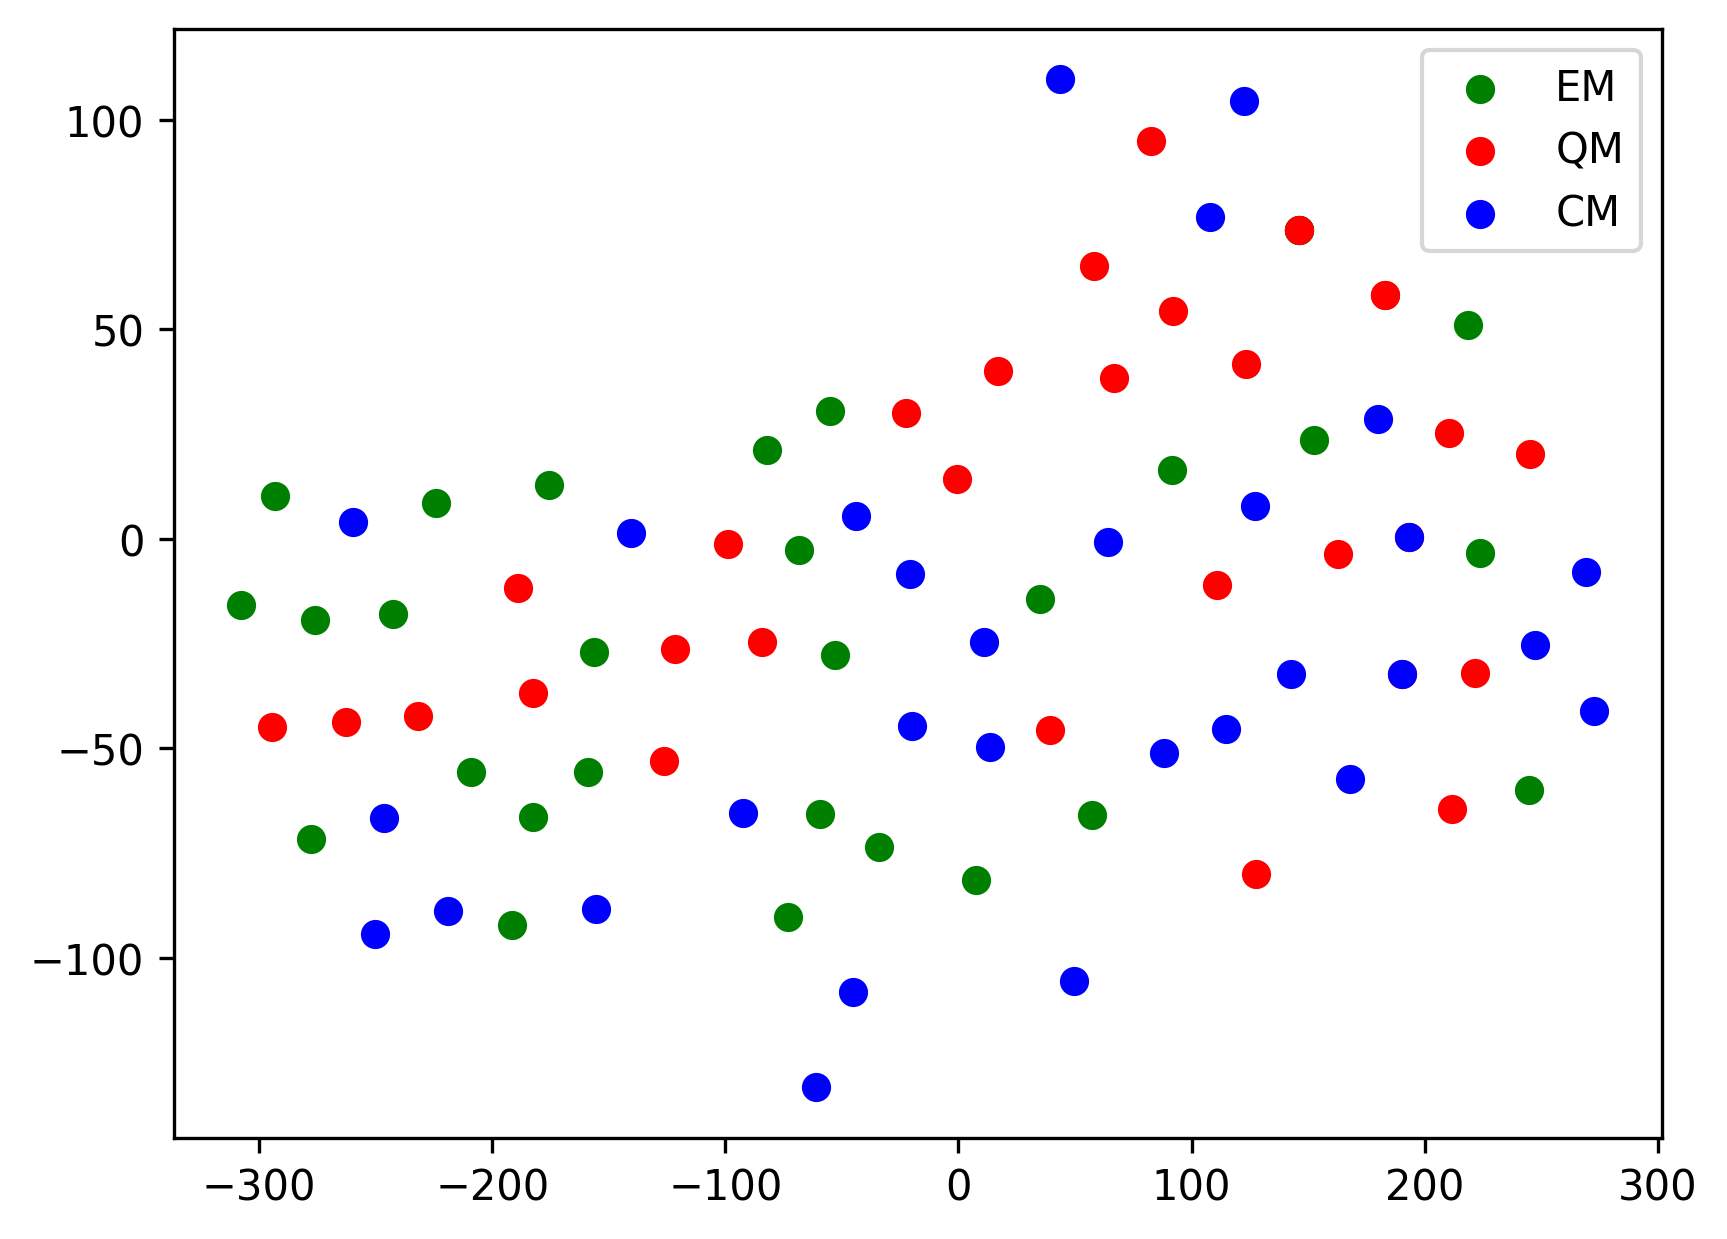

In [22]:
plt.figure()
plt.scatter(x_tsne[np.where(y==1),0], x_tsne[np.where(y==1), 1], color='g', label = "EM")
plt.scatter(x_tsne[np.where(y==2),0], x_tsne[np.where(y==2), 1], color='r', label = "QM")
plt.scatter(x_tsne[np.where(y==3),0], x_tsne[np.where(y==3), 1], color='b', label = "CM")
plt.legend()

In [23]:
clust_data_4 = tuple(map(tuple, x_tsne))

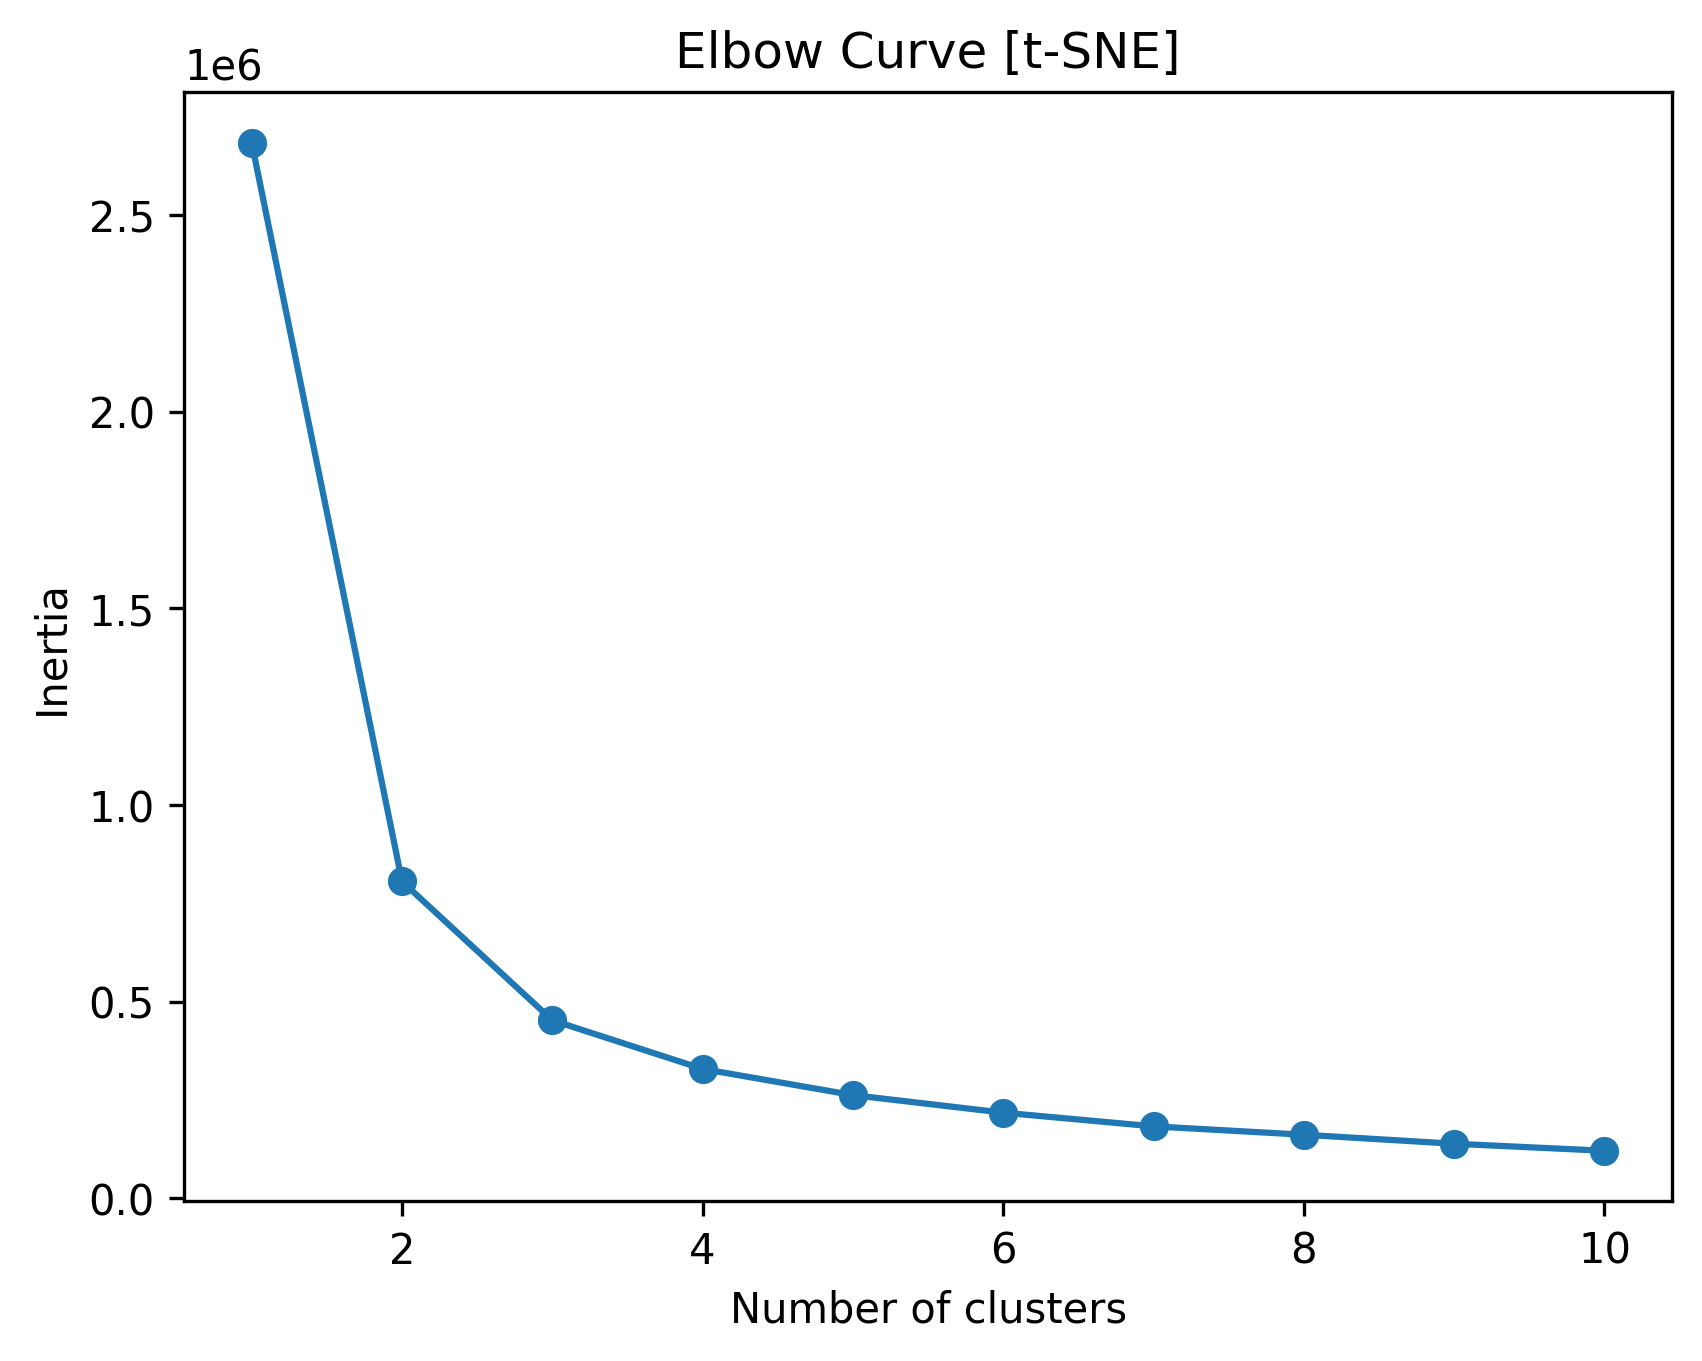

In [24]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_4)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [t-SNE]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

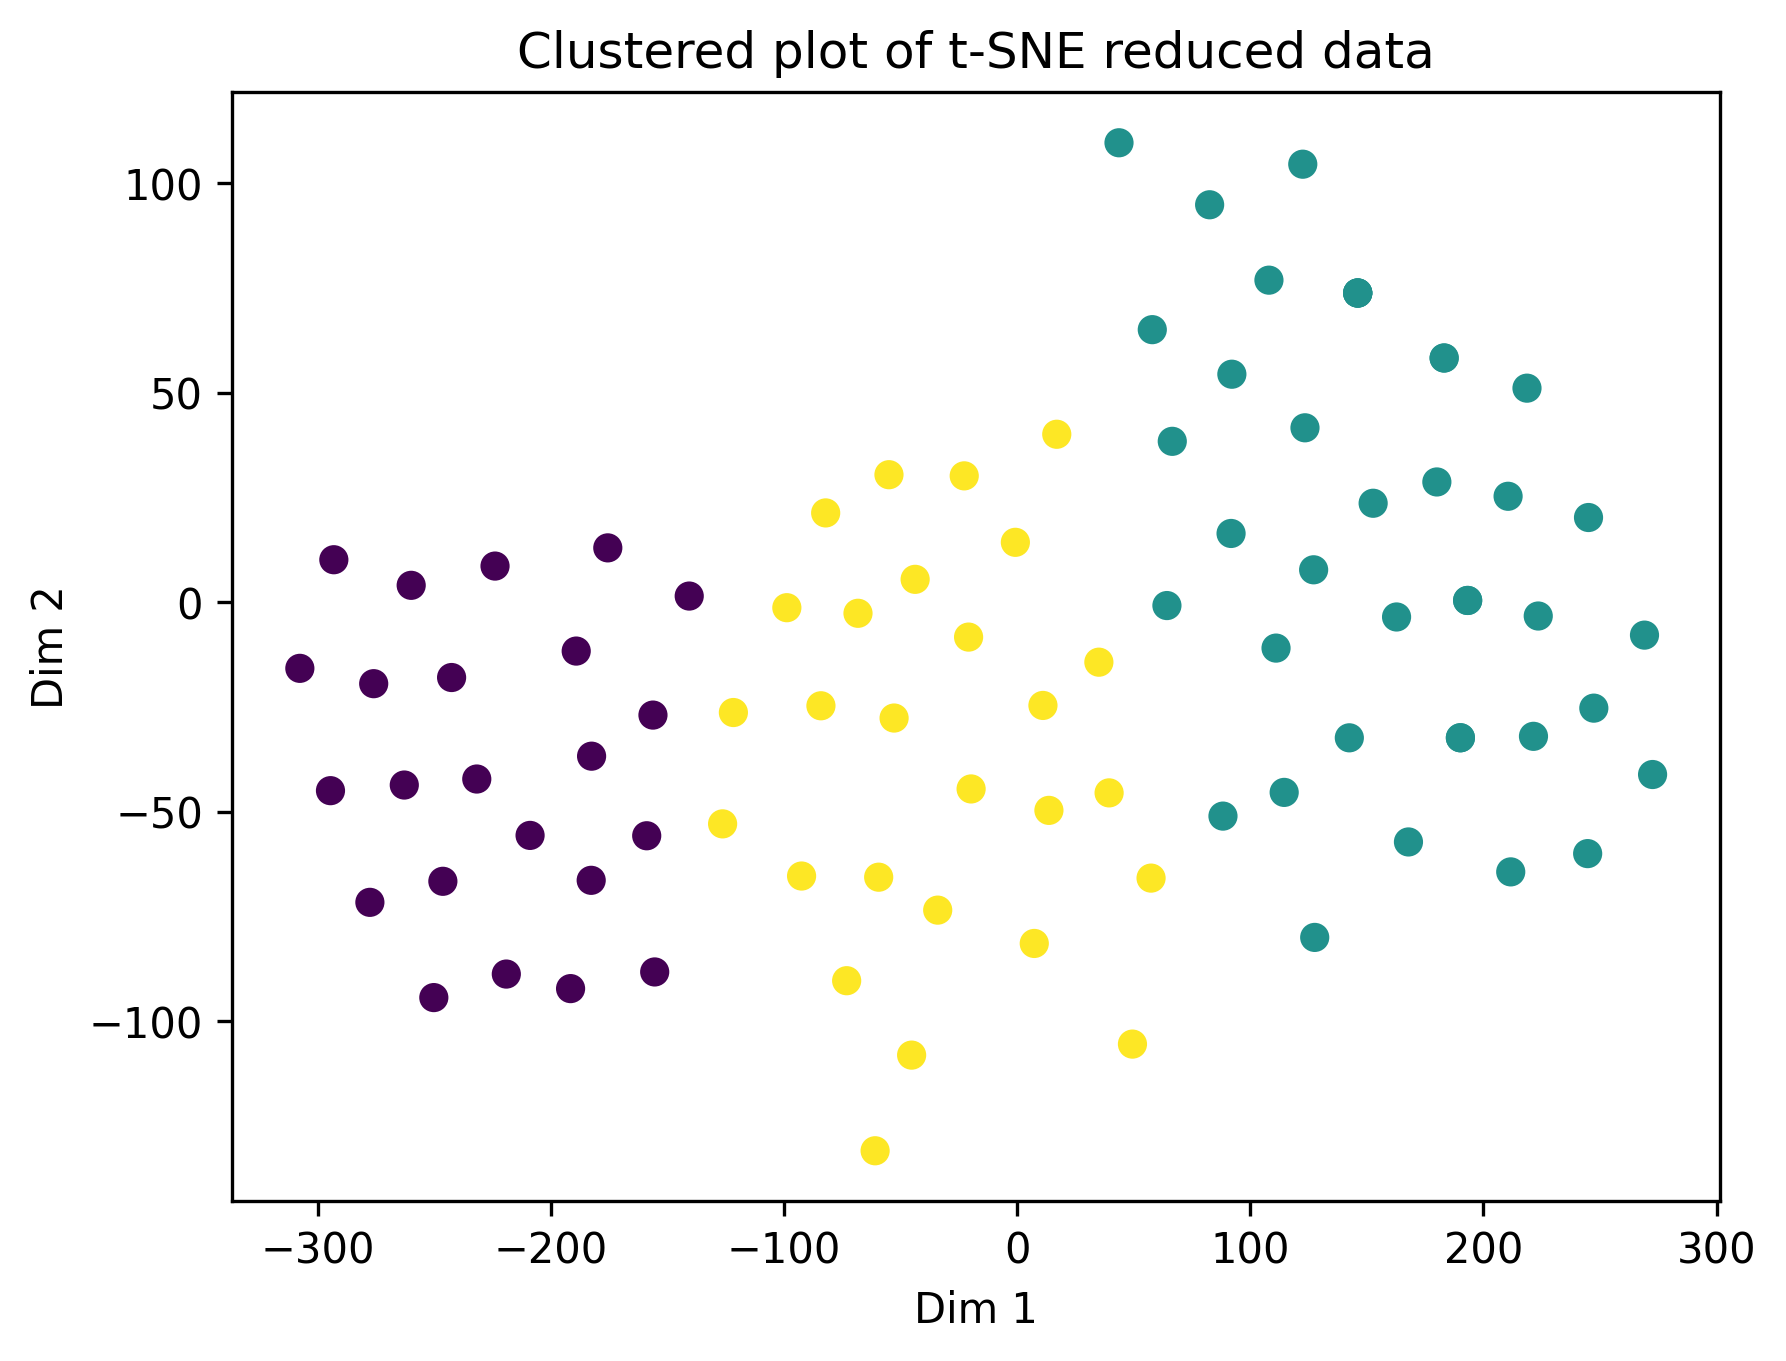

1 = green, 2 = yellow, 0 = purple


In [25]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_4)

#Plotting classified data
plt.scatter(x_tsne[np.where(y>0),0], x_tsne[np.where(y>0), 1], c=kmeans.labels_)
plt.title('Clustered plot of t-SNE reduced data')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()
print("1 = green, 2 = yellow, 0 = purple")
sort_4 = np.column_stack((kmeans.labels_,ques))
sort_4 = sort_4[sort_4[:,0].argsort()] 